# CSIC 5011 - HW6

----
### NGUYEN Huu Canh
### SID: 20818623
----

## Q1. Order the faces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the data matrix
data = sio.loadmat('face.mat')
data = data['Y']

# Transpose the axis to move the 33 dimension to the front
data = np.transpose(data, (2, 0, 1))

# Reshape the data to 33x10304
data = data.reshape(data.shape[0], -1)

#### a. MDS

In [4]:
# Compute the pairwise distances between the data points
D = np.sqrt(((data[:, np.newaxis, :] - data[np.newaxis, :, :]) ** 2).sum(axis=-1))

# Compute the MDS embedding of the data on the top two eigenvectors
mds = MDS(n_components=2, random_state=0, dissimilarity='precomputed')
X_mds = mds.fit_transform(D)

# Order the faces according to the top 1st eigenvector
order = np.argsort(X_mds[:, 0])

/home/chris/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


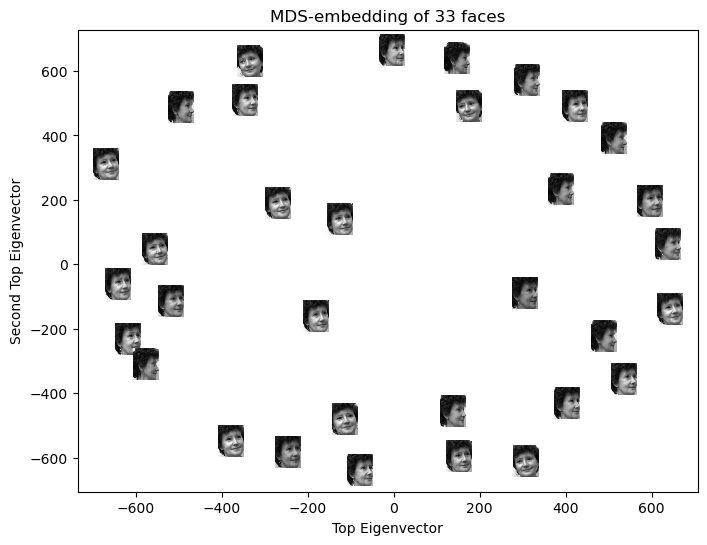

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the MDS-embedding
plt.scatter(X_mds[:, 0], X_mds[:, 1])

# Add annotations for the faces
for i, index in enumerate(order):
    img = data[i].reshape(112,92)
    imagebox = OffsetImage(img, zoom=0.2, cmap='gray')
    ab = AnnotationBbox(imagebox, xy=(X_mds[index, 0], X_mds[index, 1]), frameon=False)
    ax.add_artist(ab)

plt.xlabel('Top Eigenvector')
plt.ylabel('Second Top Eigenvector')
plt.title('MDS-embedding of 33 faces')
plt.show()


### b. ISO-MAP

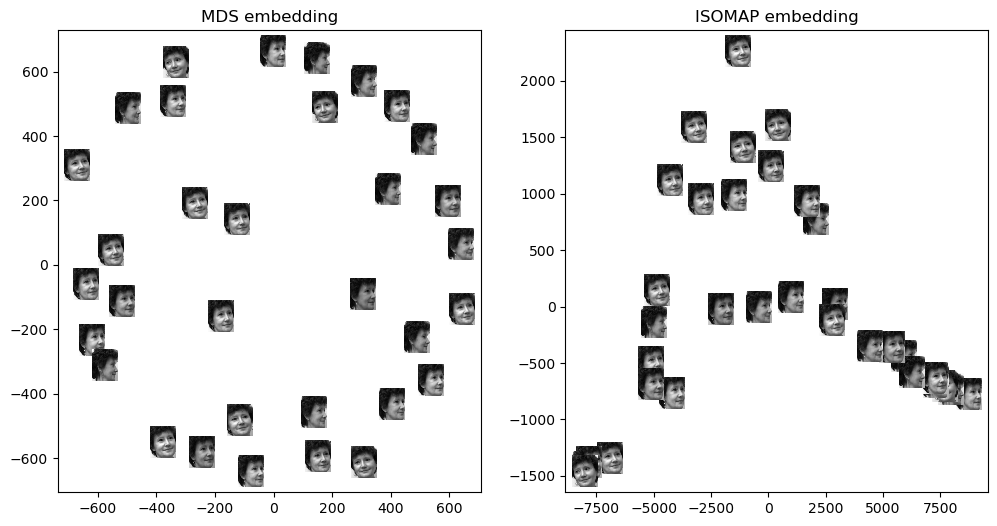

In [9]:
# Create an Isomap object with k = 5 neighbors and fit_transform the data
isomap = Isomap(n_neighbors=5, n_components=2)
Y_isomap = isomap.fit_transform(data)

# Plot MDS and ISOMAP embeddings
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].scatter(X_mds[:, 0], X_mds[:, 1])
ax[0].set_title("MDS embedding")
ax[1].scatter(Y_isomap[:, 0], Y_isomap[:, 1])
ax[1].set_title("ISOMAP embedding")
for i, index in enumerate(order):
    img = data[i].reshape(112,92)
    imagebox = OffsetImage(img, zoom=0.2, cmap='gray')
    ab = AnnotationBbox(imagebox, xy=(X_mds[index, 0], X_mds[index, 1]), frameon=False)
    ax[0].add_artist(ab)
    ab = AnnotationBbox(imagebox, xy=(Y_isomap[index, 0], Y_isomap[index, 1]), frameon=False)
    ax[1].add_artist(ab)
plt.show()


ISO-MAP and MDS are both dimensionality reduction techniques, but they work in slightly different ways. MDS aims to preserve the pairwise distances between all points in the high-dimensional space, while ISO-MAP tries to preserve the geodesic distances between points on a manifold.

The choice between ISO-MAP and MDS depends on the nature of the data and the goal of the analysis. In some cases, ISO-MAP may perform better than MDS, and in other cases, MDS may be more appropriate.

In the specific case of the 33 faces dataset, it's possible that ISO-MAP is better suited to the data than MDS. This could be due to the fact that faces tend to lie on a lower-dimensional manifold in the high-dimensional space of pixel values. By explicitly modeling the underlying manifold, ISO-MAP may be able to better capture the structure of the data than MDS, which treats all pairwise distances equally.

However, it's also possible that the choice between ISO-MAP and MDS is somewhat arbitrary, and that different choices could lead to different results. It's always a good idea to explore multiple dimensionality reduction techniques and compare their results before drawing any conclusions.

#### c. LLE vs ISO-MAP

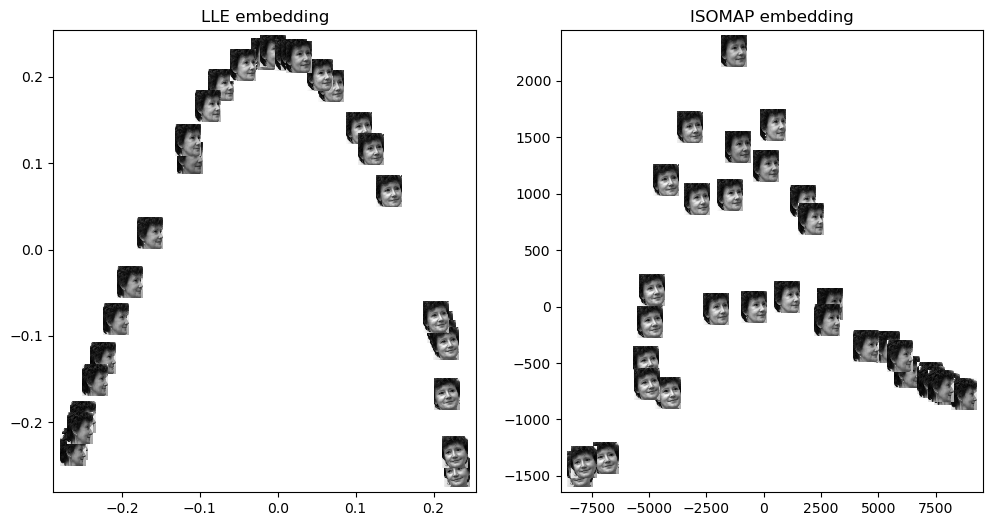

In [12]:
# Create a LocallyLinearEmbedding object with k = 5 neighbors and fit_transform the data
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_lle = lle.fit_transform(data)

# Plot LLE and ISOMAP embeddings
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].scatter(X_lle[:, 0], X_lle[:, 1])
ax[0].set_title("LLE embedding")
ax[1].scatter(Y_isomap[:, 0], Y_isomap[:, 1])
ax[1].set_title("ISOMAP embedding")
for i, index in enumerate(range(len(data))):
    img = data[i].reshape(112,92)
    imagebox = OffsetImage(img, zoom=0.2, cmap='gray')
    ab = AnnotationBbox(imagebox, xy=(X_lle[index, 0], X_lle[index, 1]), frameon=False)
    ax[0].add_artist(ab)
    ab = AnnotationBbox(imagebox, xy=(Y_isomap[index, 0], Y_isomap[index, 1]), frameon=False)
    ax[1].add_artist(ab)
plt.show()


In the case of the 33 faces dataset, the results of ISO-MAP and LLE are good but with different embeddings. ISO-MAP is based on the idea of modeling the underlying manifold of the data and computing geodesic distances, while LLE constructs a low-dimensional embedding based on the linear relationships between nearby points.

Besides, another potential difference between the two techniques is the computational complexity. 